In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<IPython.core.display.Javascript object>


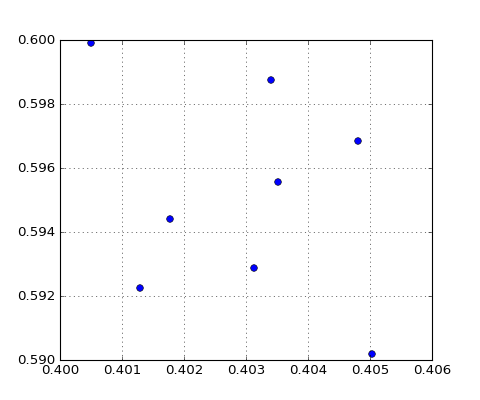

7

In [8]:
def key_press_callback(event):
    
    
def button_press_callback(event)
    plt.plot(event.xdata, event.ydata, 'bo')

fig = plt.figure(figsize=(6, 5))
ax = fig.gca()
ax.grid('on')   
# If don't turn this on, the graph will go nuts scaling itself
# with the first two points chosen.
ax.set_autoscale_on(False)

# Setup the callbacks
fig.canvas.mpl_connect('button_press_event', button_press_callback)
fig.canvas.mpl_connect('key_press_event', key_press_callback)

<IPython.core.display.Javascript object>


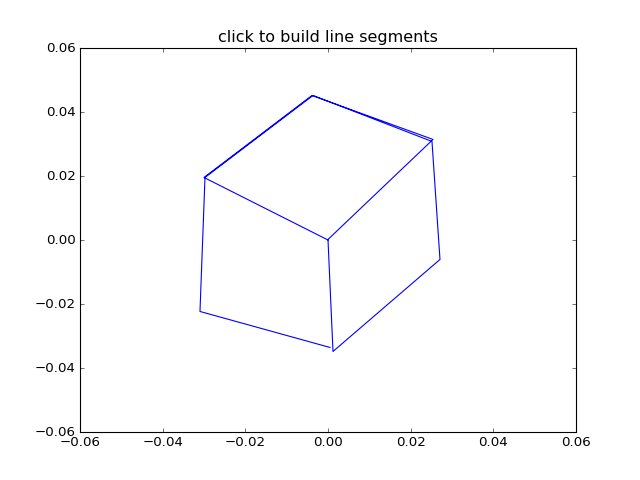

In [10]:
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print 'click', event
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

<IPython.core.display.Javascript object>


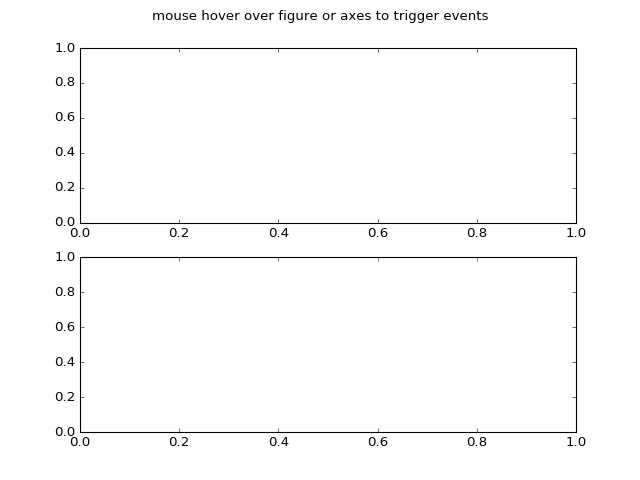

<IPython.core.display.Javascript object>


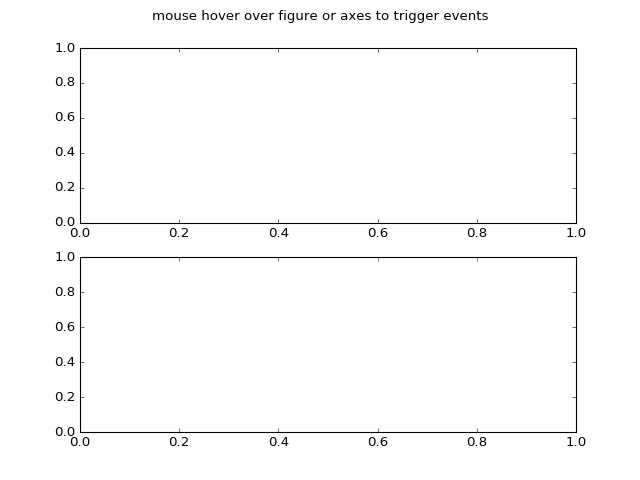

10

In [13]:
"""
Illustrate the figure and axes enter and leave events by changing the
frame colors on enter and leave
"""

def enter_axes(event):
    print 'enter_axes', event.inaxes
    event.inaxes.patch.set_facecolor('yellow')
    event.canvas.draw()

def leave_axes(event):
    print 'leave_axes', event.inaxes
    event.inaxes.patch.set_facecolor('white')
    event.canvas.draw()

def enter_figure(event):
    print 'enter_figure', event.canvas.figure
    event.canvas.figure.patch.set_facecolor('red')
    event.canvas.draw()

def leave_figure(event):
    print 'leave_figure', event.canvas.figure
    event.canvas.figure.patch.set_facecolor('grey')
    event.canvas.draw()

fig1 = plt.figure()
fig1.suptitle('mouse hover over figure or axes to trigger events')
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

fig1.canvas.mpl_connect('figure_enter_event', enter_figure)
fig1.canvas.mpl_connect('figure_leave_event', leave_figure)
fig1.canvas.mpl_connect('axes_enter_event', enter_axes)
fig1.canvas.mpl_connect('axes_leave_event', leave_axes)

fig2 = plt.figure()
fig2.suptitle('mouse hover over figure or axes to trigger events')
ax1 = fig2.add_subplot(211)
ax2 = fig2.add_subplot(212)

fig2.canvas.mpl_connect('figure_enter_event', enter_figure)
fig2.canvas.mpl_connect('figure_leave_event', leave_figure)
fig2.canvas.mpl_connect('axes_enter_event', enter_axes)
fig2.canvas.mpl_connect('axes_leave_event', leave_axes)

<IPython.core.display.Javascript object>


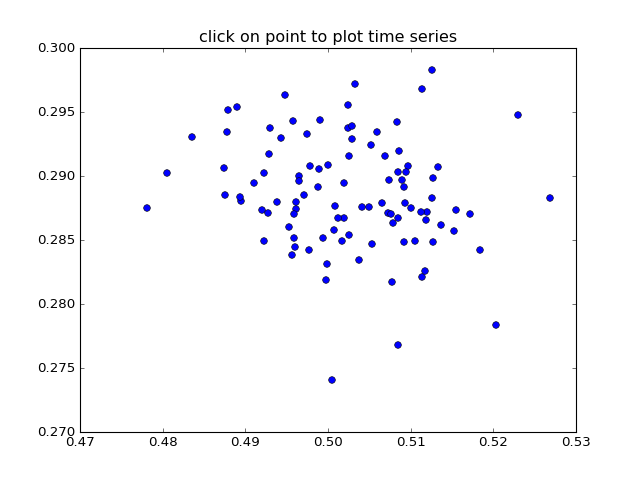

7

In [16]:
"""
compute the mean and stddev of 100 data sets and plot mean vs stddev.
When you click on one of the mu, sigma points, plot the raw data from
the dataset that generated the mean and stddev
"""
import numpy as np

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance


def onpick(event):

    if event.artist!=line: return True

    N = len(event.ind)
    if not N: return True


    figi = plt.figure()
    for subplotnum, dataind in enumerate(event.ind):
        ax = figi.add_subplot(N,1,subplotnum+1)
        ax.plot(X[dataind])
        ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)